## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('austin_weather.csv')

In [3]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [4]:
df.shape

(1319, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [6]:
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

## Droping unwanted columns

In [7]:
df= df.drop(['Events','Date','SeaLevelPressureLowInches'], axis=1)

In [8]:
# df.drop(['SeaLevelPressureLowInches','SeaLevelPressureHighInches'],axis=1, inplace =True)

In [9]:
df.shape

(1319, 18)

In [10]:
df= df.replace('T',0.0)

In [11]:
df= df.replace('-',0.0)

In [12]:
df.to_csv('austin_weather_final.csv')

## Importing sklearn and linear regression model 

In [13]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [14]:
data= pd.read_csv('austin_weather_final.csv')

In [15]:
# data= data.replace("-",0.0)

In [16]:
data.head(10)

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
5,5,57,48,39,39.0,36.0,33.0,79.0,63.0,47.0,30.47,30.40,10.0,9.0,7.0,12.0,3.0,17.0,0.00
6,6,60,53,45,41.0,39.0,37.0,83.0,65.0,47.0,30.46,30.39,10.0,9.0,7.0,7.0,1.0,11.0,0.00
7,7,62,51,40,43.0,39.0,33.0,92.0,64.0,36.0,30.33,30.17,10.0,10.0,7.0,10.0,2.0,14.0,0.00
8,8,64,50,36,49.0,41.0,28.0,92.0,76.0,60.0,30.31,30.10,10.0,10.0,4.0,17.0,5.0,24.0,0.00
9,9,44,40,35,31.0,26.0,21.0,75.0,60.0,45.0,30.44,30.33,10.0,10.0,10.0,13.0,5.0,21.0,0.00


In [17]:
x= data.drop(['PrecipitationSumInches'], axis=1)

In [18]:
y= data['PrecipitationSumInches']

In [19]:
y= y.values.reshape(-1,1)

In [20]:
y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [21]:
day_index= 798
days= [i for i in range(y.size)]


In [22]:
clf = LinearRegression()
clf.fit(x,y)

LinearRegression()

## Plotting graphs to get the linear relation 

Precipitation trend graph: 


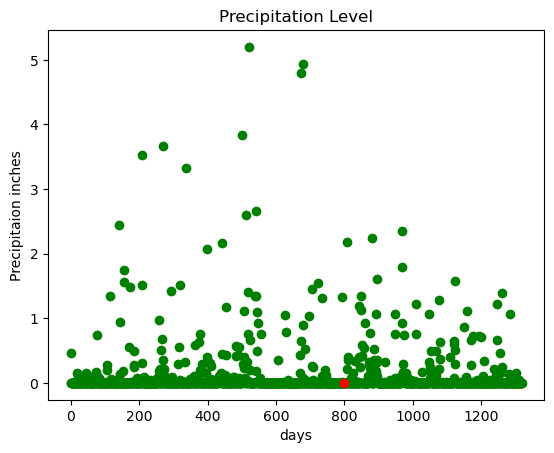

In [23]:
# plotting a graph
print("Precipitation trend graph: ")
plt.scatter(days, y, color='g')
plt.scatter(days[day_index],y[day_index], color ='red')

plt.title('Precipitation Level')
plt.xlabel('days')
plt.ylabel('Precipitaion inches')

plt.show()
x_vis= x.filter(['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH'])

Precipitation vs attributes trend graph: 


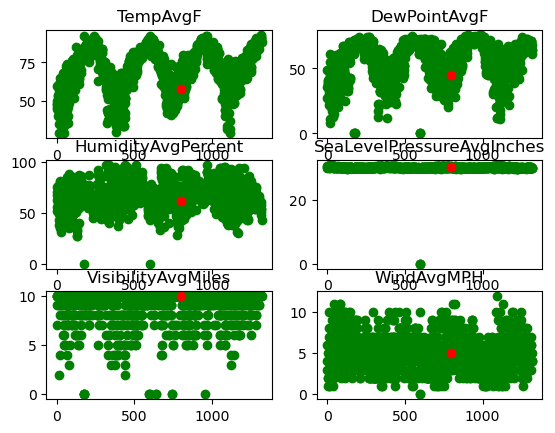

In [27]:
print("Precipitation vs attributes trend graph: ")
for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index],x_vis[x_vis.columns.values[i]][day_index], color ='r')
    plt.title(x_vis.columns.values[i])
plt.show()